# SVM

**Support Vector Machine (SVM, метод опорных векторов)** — это мощный алгоритм машинного обучения, основанный на принципе структурного минимизации. Он строит гиперплоскость в пространстве признаков, которая оптимально разделяет классы данных, при этом минимизируя ошибку обобщения.

Основная идея SVM — найти гиперплоскость, которая максимально разделяет классы данных в пространстве признаков. Метод можно использовать как для задач классификации, так и задач регрессии.

## Основные термины

SVM ищет плоскость, которая разделяет классы с максимальным зазором (margin) между ближайшими точками обоих классов.

* **Margin** — это расстояние между гиперплоскостью и ближайшими точками классов.

* **Опорные вектора (Support Vectors)** — это точки, которые находятся на границах зазора. Они определяют положение гиперплоскости. Удаление других точек (неопорных) не изменяет решение.

Линейно разделимые данные — это набор данных, в котором существует гиперплоскость, способная разделить два класса таким образом, что все точки одного класса находятся по одну сторону гиперплоскости, а все точки другого класса — по другую сторону.

> Если данные линейно разделимы, SVM построит гиперплоскость, которая идеально разделяет классы.

> Если данные нельзя разделить линейной гиперплоскостью, SVM использует **ядерные методы** (kernel methods).

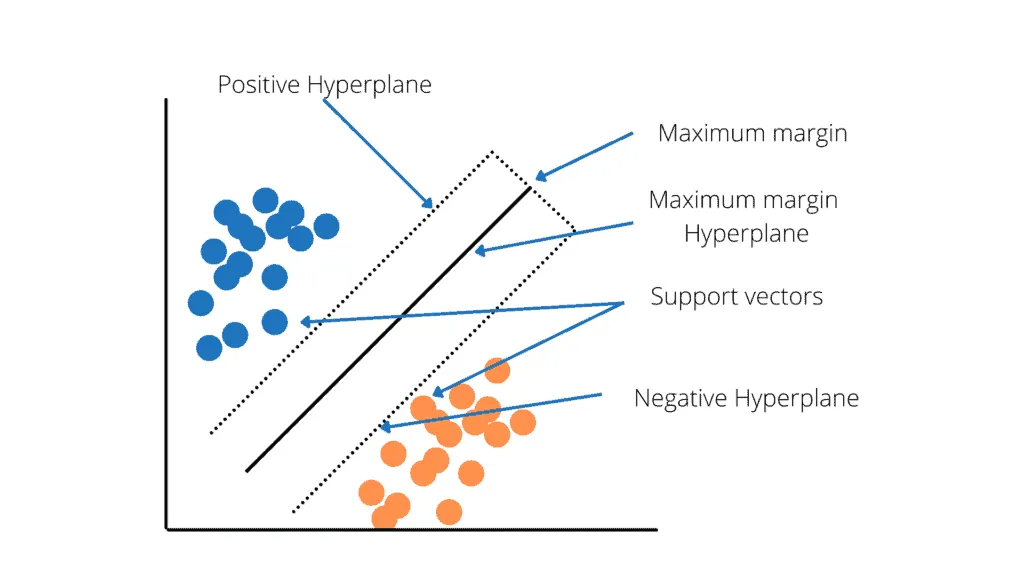

## Задача оптимизации

Пусть у нас есть обучающая выборка $\{(x_i, y_i)\}$, где $x_i \in \mathbb{R}^n$ — это вектор признаков, а $y_i \in \{-1, 1\}$ — метка класса.

Рассмотрим двухмерный случай. Пусть у нас есть два класса данных, обозначенные синими и красными точками. Если можно провести прямую линию так, чтобы все синие точки были по одну сторону линии, а все красные — по другую, то такие данные называются линейно разделимыми.

Для линейно разделимых данных мы можем найти гиперплоскость, определяемую уравнением $ w \cdot x + b = 0 $, которая разделяет классы. Здесь $ w $ — вектор весов (нормаль к гиперплоскости), $ x $ — вектор признаков, а $ b $ — смещение.

Условия линейной разделимости:

1. $ w \cdot x_i + b \geq 1 $ для всех $ x_i $ класса +1 (положительный класс)
2. $ w \cdot x_i + b \leq -1 $ для всех $ x_i $ класса -1 (отрицательный класс)

Эти два условия можно объединить в одно:

$
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
$

**Формальная задача оптимизации для линейно разделимых данных:**

$
\begin{aligned}
& \min_{w, b} \frac{1}{2} \|w\|^2 \\
& \text{при условии } y_i (w \cdot x_i + b) \geq 1, \quad \forall i
\end{aligned}
$

Цель этой задачи — минимизировать норму вектора весов
𝑤, что эквивалентно максимизации зазора. Здесь $\|w\|^2$ минимизируется для максимизации отступа, а ограничения $ y_i (w \cdot x_i + b) \geq 1 $ гарантируют, что все точки данных правильно классифицированы и находятся за границей отступа.

**Отступ (маржин)** — это минимальное расстояние от точек данных до гиперплоскости. Если гиперплоскость задается уравнением $ w \cdot x + b = 0 $, то отступ для правильно классифицированных точек $ x_i $ определяется как:

$
\text{Отступ} = \frac{1}{\|w\|}
$

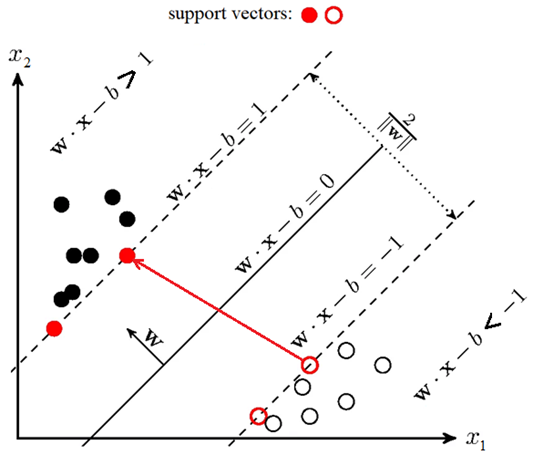

**Задача оптимизации для линейно неразделимых данных**:

Для обработки линейно неразделимых данных в методе опорных векторов (SVM) вводятся **переменные ослабления** $\xi_i$, которые позволяют некоторым точкам данных находиться на неправильной стороне гиперплоскости. Это приводит к введению понятия мягкого отступа.

Формальная задача оптимизации для линейно неразделимых данных:

$
\begin{aligned}
& \min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i \\
& \text{при условии } y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \forall i \\
& \xi_i \geq 0, \quad \forall i
\end{aligned}
$

Здесь:
- $\|w\|^2$ минимизируется для максимизации отступа.
- $C$ — параметр регуляризации, который контролирует штраф за ошибочные классификации. Чем больше значение $C$, тем меньше допускается ошибок.
- $\xi_i$ — переменные ослабления, измеряющие степень ошибки классификации.

При использовании мягкого отступа SVM находит гиперплоскость, которая максимально разделяет классы, но допускает некоторые ошибки, чтобы обеспечить более гибкое разделение. Это особенно важно для данных, которые нельзя полностью разделить линейной гиперплоскостью.

## Ядерные методы (Kernel Methods)
**Ядро** — это функция, которая позволяет преобразовать данные в пространство **более высокой размерности**, где они становятся линейно разделимыми. Вместо явного преобразования, ядро вычисляет скалярное произведение точек в новом пространстве.

Если данные нельзя разделить линейно, их можно преобразовать в пространство более высокой размерности $\Phi(x)$ с помощью ядровой функции $K(x, x') = \Phi(x) \cdot \Phi(x')$. Это позволяет работать в новом пространстве без явного вычисления $\Phi(x)$.

Допустим, у нас есть два объекта
𝑥 и 𝑥′ в исходном пространстве. Мы хотим преобразовать их в пространство более высокой размерности с помощью функции
$Φ(x)$. Например:

* Исходное пространство: $x=(x_1, x_2)$

* Преобразованное пространство: $Φ(x)=(x^2_1, \sqrt2x_1x_2, x^2_2$).

После этого мы можем вычислять скалярное произведение $Φ(x)⋅Φ(x′)$.

Вместо явного вычисления $Φ(x)$ ядро $K(x,x′)$ сразу вычисляет скалярное произведение в новом пространстве: $$K(x,x′) = Φ(x)⋅Φ(x′)$$
Это позволяет избежать дорогостоящего вычисления векторов $Φ(x)$.

## Популярные ядровые функции

1. **Линейное ядро** $K(x,x′)=x⋅x′ $.
Используется, если данные линейно разделимы в исходном пространстве.
Не выполняет никакого преобразования.
2. **Полиномиальное ядро** $K(x,x′)=(x⋅x′+c)^d$.
$d$ — степень полинома,
$c$ — параметр, управляющий смещением.

3. **Гауссово ядро** (RBF, Radial Basis Function) $K(x,x′)=exp(− \frac{∥x−x′∥^2}{2\sigma^2}$).
Используется для сложных разделений.

Параметр 𝜎 определяет ширину гауссиана.

Особенность: Гауссово ядро фактически переводит данные в бесконечномерное пространство.

4. **Сигмоидное ядро**  $K(x,x′)=tanh(αx⋅x′ +c)$.
Напоминает вычисления в искусственных нейронных сетях.
Параметры 𝛼 и 𝑐 регулируют форму ядра.